In [ ]:
case_1= "A green block sitting on a wooden kitchen table"
case_2= "A small metal cube sitting on a carpet floor"
case_3= "A green block in a bowl"
case_4= "Two different sized blocks sitting on a chair"
case_5= "A metal block stacked ontop of a purple block on a table"
case_6= "A metal block stacked ontop of a purple block ontop of a green block"
case_7= "Three different colored blocks on a carpet floor"
case_8= "A soda can ontop of a green block"
case_9= "A soda can next to a green block on a toilet seat"
case_10= "Three cans of soda next to each other on a toilet seat" 

# Part 1a using BERT

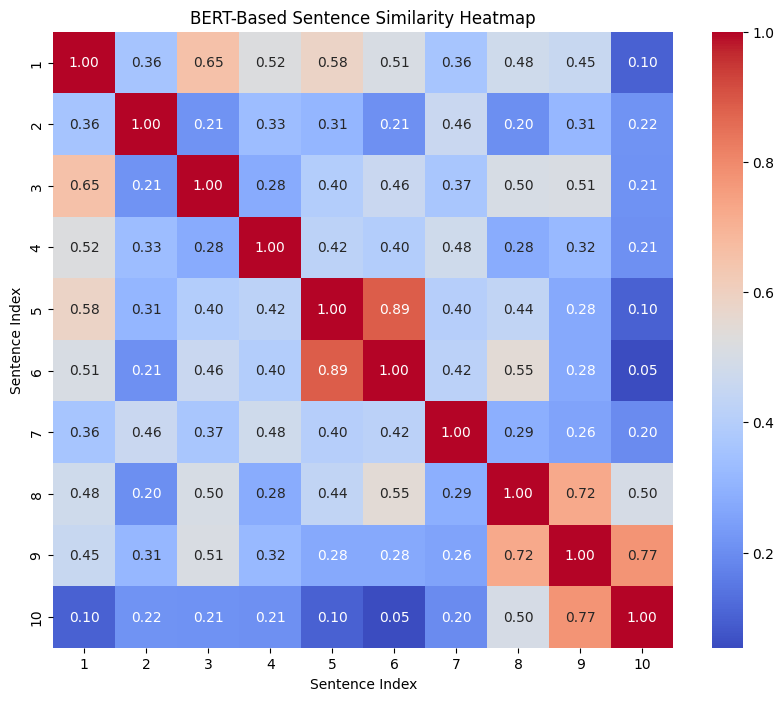


Sentence Index Mapping:

1: A green block sitting on a wooden kitchen table
2: A small metal cube sitting on a carpet floor
3: A green block in a bowl
4: Two different sized blocks sitting on a chair
5: A metal block stacked ontop of a purple block on a table
6: A metal block stacked ontop of a purple block ontop of a green block
7: Three different colored blocks on a carpet floor
8: A soda can ontop of a green block
9: A soda can next to a green block on a toilet seat
10: Three cans of soda next to each other on a toilet seat


In [5]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Descriptions of the 10 images
descriptions = [
    "A green block sitting on a wooden kitchen table",
    "A small metal cube sitting on a carpet floor",
    "A green block in a bowl",
    "Two different sized blocks sitting on a chair",
    "A metal block stacked ontop of a purple block on a table",
    "A metal block stacked ontop of a purple block ontop of a green block",
    "Three different colored blocks on a carpet floor",
    "A soda can ontop of a green block",
    "A soda can next to a green block on a toilet seat",
    "Three cans of soda next to each other on a toilet seat" 
]

# Compute sentence embeddings
embeddings = model.encode(descriptions, convert_to_tensor=True)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings.cpu().numpy())

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=range(1, 11), yticklabels=range(1, 11))

# Labels and title
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.title("BERT-Based Sentence Similarity Heatmap")

# Show the heatmap
plt.show()

# Print sentences with their index
print("\nSentence Index Mapping:\n")
for i, sentence in enumerate(descriptions, start=1):
    print(f"{i}: {sentence}")


# Part 1b

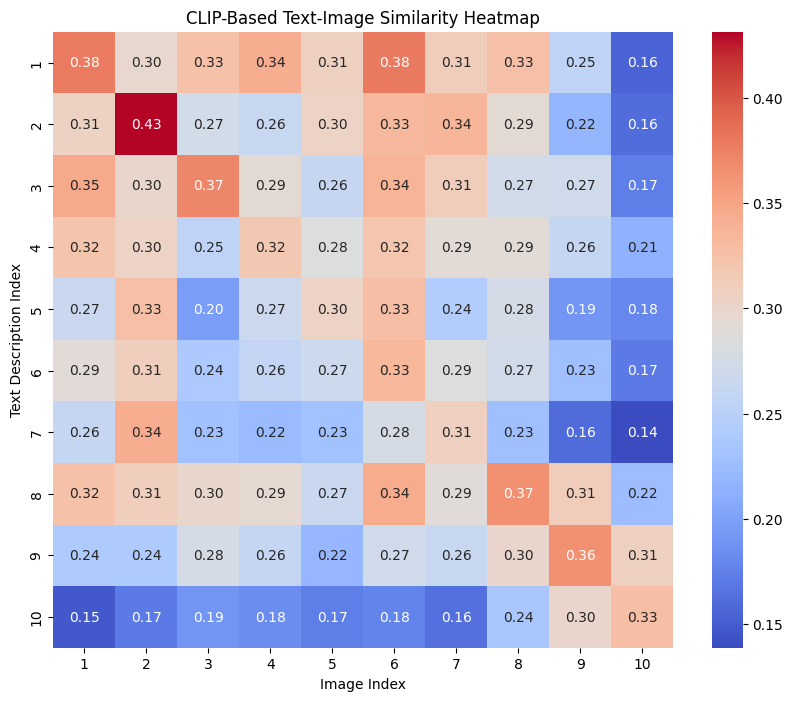


Text & Image Index Mapping:

1: A green block sitting on a wooden kitchen table → \case_0.jpg
2: A small metal cube sitting on a carpet floor → \case_1.jpg
3: A green block in a bowl → \case_2.jpg
4: Two different sized blocks sitting on a chair → \case_3.jpg
5: A metal block stacked ontop of a purple block on a table → \case_4.jpg
6: A metal block stacked ontop of a purple block ontop of a green block → \case_5.jpg
7: Three different colored blocks on a carpet floor → \case_6.jpg
8: A soda can ontop of a green block → \case_7.jpg
9: A soda can next to a green block on a toilet seat → \case_8.jpg
10: Three cans of soda next to each other on a toilet seat → \case_9.jpg


In [15]:
import torch
import clip
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

# Ensure CLIP is installed correctly
try:
    model, preprocess = clip.load("ViT-B/32", device="cuda" if torch.cuda.is_available() else "cpu")
except AttributeError:
    raise ImportError("Error: CLIP module does not have a 'load' function! Ensure you installed OpenAI's CLIP with:\n"
                      "pip uninstall clip -y\n"
                      "pip install git+https://github.com/openai/CLIP.git")

# Define text descriptions
descriptions = [
    "A green block sitting on a wooden kitchen table",
    "A small metal cube sitting on a carpet floor",
    "A green block in a bowl",
    "Two different sized blocks sitting on a chair",
    "A metal block stacked ontop of a purple block on a table",
    "A metal block stacked ontop of a purple block ontop of a green block",
    "Three different colored blocks on a carpet floor",
    "A soda can ontop of a green block",
    "A soda can next to a green block on a toilet seat",
    "Three cans of soda next to each other on a toilet seat" 
]

# Load the corresponding 10 images
folder_path = r"C:\Users\Dimitri Gonidakis\Desktop\School laptop\Year 5\Semester 2\Computational creativity\Project 3\part1"
image_paths = [os.path.join(folder_path, f"case_{i}.jpg") for i in range(0, 10)]

# Ensure all images exist
missing_files = [path for path in image_paths if not os.path.exists(path)]
if missing_files:
    raise FileNotFoundError(f"Missing images: {missing_files}")

# Preprocess images for CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
images = [preprocess(Image.open(img_path)).unsqueeze(0).to(device) for img_path in image_paths]

# Encode text and images using CLIP
with torch.no_grad():
    text_features = model.encode_text(clip.tokenize(descriptions).to(device))
    image_features = torch.cat([model.encode_image(img) for img in images])

# Normalize the feature vectors
text_features /= text_features.norm(dim=-1, keepdim=True)
image_features /= image_features.norm(dim=-1, keepdim=True)

# Compute cosine similarity between text and images
similarity_matrix = cosine_similarity(text_features.cpu().numpy(), image_features.cpu().numpy())

# Create a heatmap to visualize the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=range(1, 11), yticklabels=range(1, 11))

# Labels and title
plt.xlabel("Image Index")
plt.ylabel("Text Description Index")
plt.title("CLIP-Based Text-Image Similarity Heatmap")

# Show the heatmap
plt.show()

# Print sentence-to-image mapping
print("\nText & Image Index Mapping:\n")
for i, (sentence, img_path) in enumerate(zip(descriptions, image_paths), start=1):
    filename=(img_path.split('part1'))[-1]
    print(f"{i}: {sentence} → {filename}")


# Part 1C

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\lpips\weights\v0.1\alex.pth

LPIPS Similarity Matrix:
 [[0.         0.84666586 0.64577746 0.65483052 0.6041187  0.47831824
  1.0086726  0.53274626 0.62701362 0.6361779 ]
 [0.84666586 0.         0.81021541 0.82719034 0.75081623 0.82590294
  0.62256044 0.80531979 0.80527294 0.81360531]
 [0.64577746 0.81021541 0.         0.66169113 0.60659373 0.63528788
  0.93459529 0.67905515 0.58721602 0.58528531]
 [0.65483052 0.82719034 0.66169113 0.         0.70022774 0.64267004
  1.00785184 0.61954784 0.62922585 0.62541777]
 [0.6041187  0.75081623 0.60659373 0.70022774 0.         0.48417962
  0.89522064 0.5412727  0.63788474 0.65023297]
 [0.47831824 0.82590294 0.63528788 0.64267004 0.48417962 0.
  0.99404109 0.3669844  0.63838375 0.64721733]
 [1.0086726  0.62256044 0.93459529 1.00785184 0.89522064 0.99404109
  0.         0.97775978 0.99026328 0.9929024 ]
 [0.53274626 0.80531979 0.67905515 0.619547

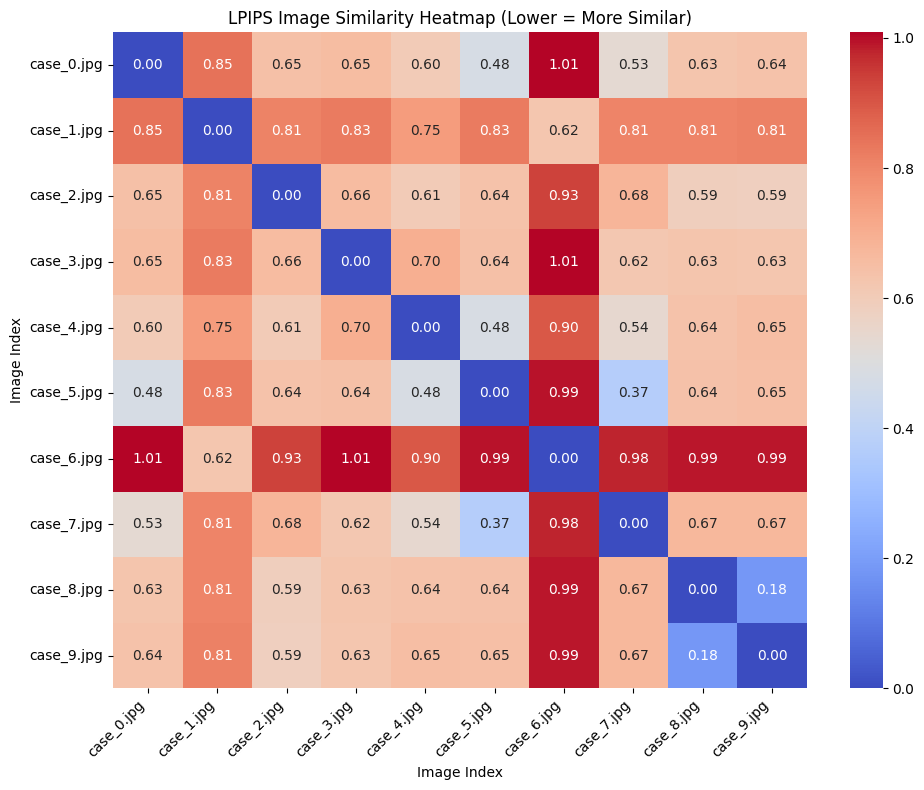

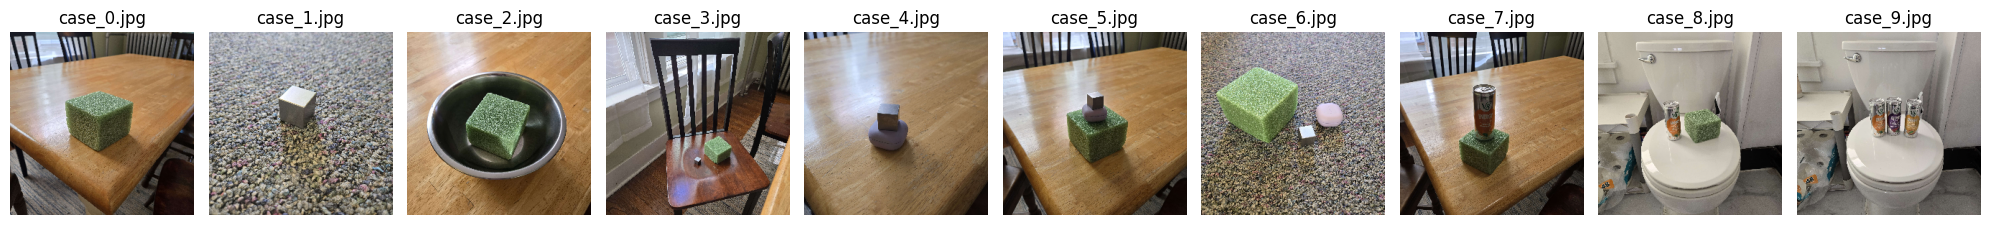

In [8]:
import cv2
import numpy as np
import torch
import lpips
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load LPIPS model
lpips_model = lpips.LPIPS(net='alex')

# Function to compute LPIPS
def compute_lpips(img1, img2):
    img1_t = torch.tensor(img1).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img2_t = torch.tensor(img2).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    return lpips_model(img1_t, img2_t).item()

# Load images from a folder
def load_images(folder_path, size=(256, 256)):  # Adjust size as needed
    images = []
    filenames = sorted(os.listdir(folder_path))  # Sort for consistent order
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, size)  # Resize for consistency
            images.append(img)
    return images, filenames

# Compute LPIPS similarity matrix
def compute_lpips_matrix(images):
    num_images = len(images)
    lpips_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(num_images):
            if i != j:  # Skip self-comparison
                lpips_matrix[i, j] = compute_lpips(images[i], images[j])
            else:
                lpips_matrix[i, j] = 0  # LPIPS min similarity for identical images

    return lpips_matrix

# Plot LPIPS similarity heatmap
def plot_lpips_heatmap(lpips_matrix, filenames):
    plt.figure(figsize=(10, 8))
    sns.heatmap(lpips_matrix, annot=True, cmap="coolwarm", fmt=".2f",
                xticklabels=filenames, yticklabels=filenames)
    
    plt.xlabel("Image Index")
    plt.ylabel("Image Index")
    plt.title("LPIPS Image Similarity Heatmap (Lower = More Similar)")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def display_images(images, filenames):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 4))
    
    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        ax.set_title(filenames[i])
        ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

# Main function
def main(folder_path):
    images, filenames = load_images(folder_path)
    
    if len(images) < 2:
        print("Error: Not enough images found.")
        return
    
    lpips_matrix = compute_lpips_matrix(images)

    print("\nLPIPS Similarity Matrix:\n", lpips_matrix)
    plot_lpips_heatmap(lpips_matrix, filenames)
    display_images(images, filenames)

# Run the script (update path as needed)
main("C:/Users/Dimitri Gonidakis/Desktop/School laptop/Year 5/Semester 2/Computational creativity/Project 3/part1")


# comparing all three heatmaps

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Dimitri Gonidakis\AppData\Local\Programs\Python\Python311\Lib\site-packages\lpips\weights\v0.1\alex.pth


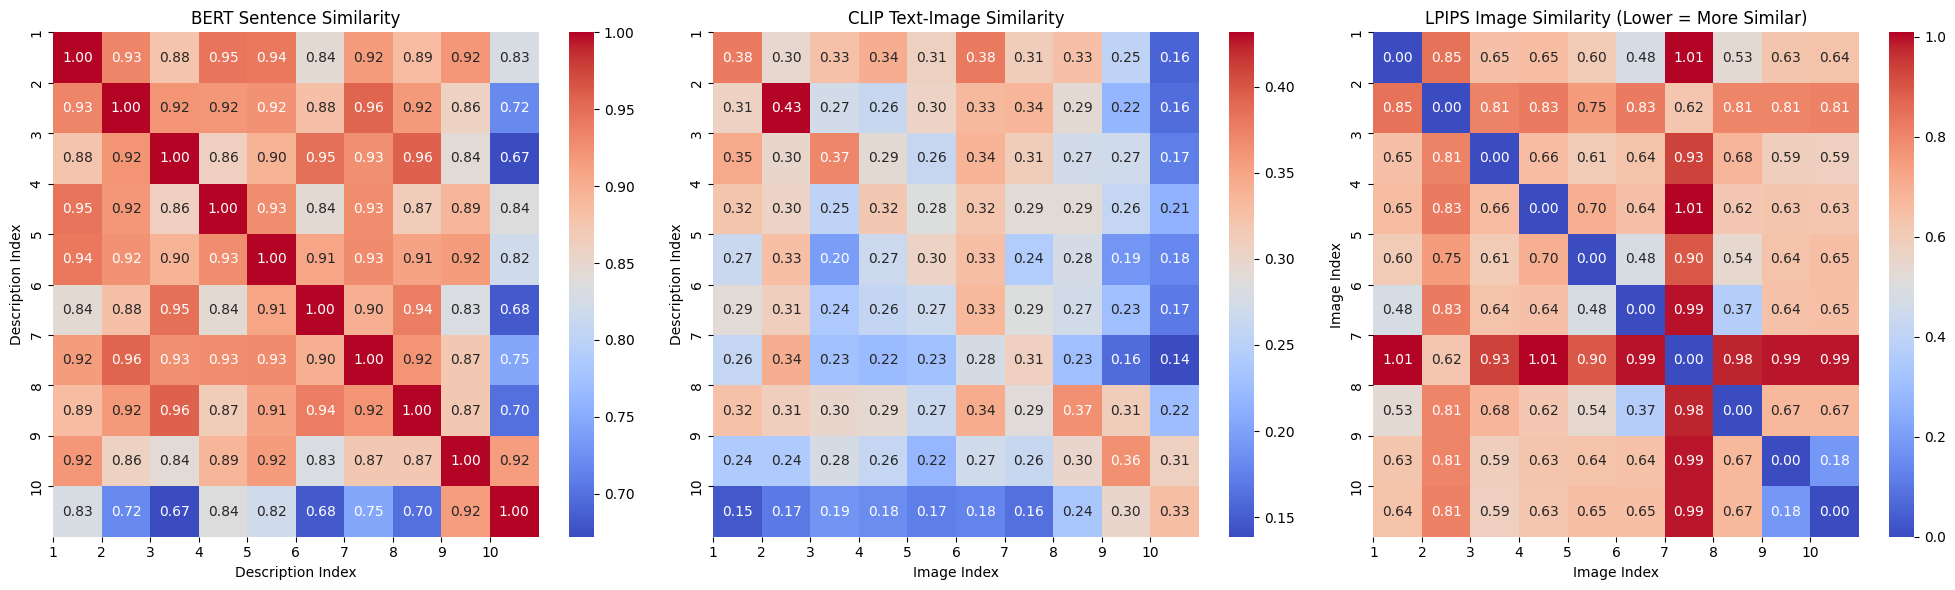

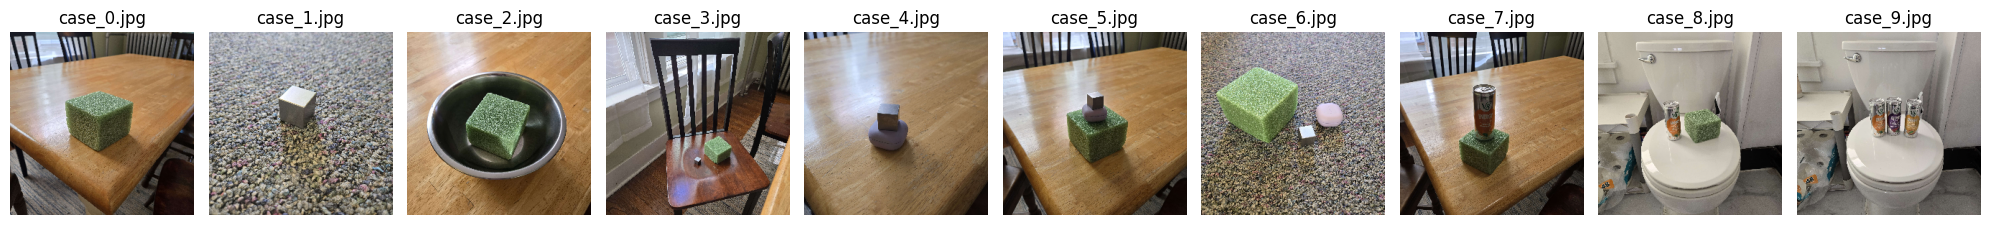


Text & Image Index Mapping:

1: A green block sitting on a wooden kitchen table → \case_0.jpg
2: A small metal cube sitting on a carpet floor → \case_1.jpg
3: A green block in a bowl → \case_2.jpg
4: Two different sized blocks sitting on a chair → \case_3.jpg
5: A metal block stacked ontop of a purple block on a table → \case_4.jpg
6: A metal block stacked ontop of a purple block ontop of a green block → \case_5.jpg
7: Three different colored blocks on a carpet floor → \case_6.jpg
8: A soda can ontop of a green block → \case_7.jpg
9: A soda can next to a green block on a toilet seat → \case_8.jpg
10: Three cans of soda next to each other on a toilet seat → \case_9.jpg


In [20]:
import torch
import clip
import lpips
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import os

# -------------------------------
# Load Pretrained Models
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

# BERT Model (for Sentence Similarity)
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# CLIP Model (for Text-Image Similarity)
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# LPIPS Model (for Image-Image Similarity)
lpips_model = lpips.LPIPS(net='alex')

# -------------------------------
# Part (a): Compute Sentence Similarity (BERT)
# -------------------------------
descriptions = [
    "A green block sitting on a wooden kitchen table",
    "A small metal cube sitting on a carpet floor",
    "A green block in a bowl",
    "Two different sized blocks sitting on a chair",
    "A metal block stacked ontop of a purple block on a table",
    "A metal block stacked ontop of a purple block ontop of a green block",
    "Three different colored blocks on a carpet floor",
    "A soda can ontop of a green block",
    "A soda can next to a green block on a toilet seat",
    "Three cans of soda next to each other on a toilet seat" 
]

# Encode sentences using BERT
with torch.no_grad():
    sentence_embeddings = torch.stack([
        bert_model(**tokenizer(desc, return_tensors="pt", padding=True, truncation=True).to(device)).last_hidden_state[:, 0, :]
        for desc in descriptions
    ]).squeeze()

sentence_embeddings = sentence_embeddings.cpu().numpy()
bert_similarity = cosine_similarity(sentence_embeddings)

# -------------------------------
# Part (b): Compute Text-Image Similarity (CLIP)
# -------------------------------
folder_path = r"C:\Users\Dimitri Gonidakis\Desktop\School laptop\Year 5\Semester 2\Computational creativity\Project 3\part1"
image_paths = [os.path.join(folder_path, f"case_{i}.jpg") for i in range(0, 10)]

# Load and encode images
images = [preprocess(Image.open(img_path)).unsqueeze(0).to(device) for img_path in image_paths]

with torch.no_grad():
    text_features = clip_model.encode_text(clip.tokenize(descriptions).to(device))
    image_features = torch.cat([clip_model.encode_image(img) for img in images])

# Normalize embeddings
text_features /= text_features.norm(dim=-1, keepdim=True)
image_features /= image_features.norm(dim=-1, keepdim=True)

# Compute cosine similarity between text and images
clip_similarity = cosine_similarity(text_features.cpu().numpy(), image_features.cpu().numpy())

# -------------------------------
# Part (c): Compute Image-Image Similarity (LPIPS)
# -------------------------------
def compute_lpips(img1, img2):
    img1_t = torch.tensor(img1).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img2_t = torch.tensor(img2).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    return lpips_model(img1_t, img2_t).item()

# Load images and resize
def load_images(folder_path, size=(256, 256)):
    images = []
    filenames = sorted(os.listdir(folder_path))
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, size)
            images.append(img)
    return images, filenames

# Compute LPIPS similarity matrix
def compute_lpips_matrix(images):
    num_images = len(images)
    lpips_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(num_images):
            if i != j:
                lpips_matrix[i, j] = compute_lpips(images[i], images[j])
            else:
                lpips_matrix[i, j] = 0

    return lpips_matrix

# Load images from folder (update path accordingly)
image_folder = "C:/Users/Dimitri Gonidakis/Desktop/School laptop/Year 5/Semester 2/Computational creativity/Project 3/part1"
images, filenames = load_images(image_folder)
lpips_similarity = compute_lpips_matrix(images)

# -------------------------------
# Plot All 3 Similarity Matrices Side by Side
# -------------------------------
# Plot All 3 Similarity Matrices Side by Side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# BERT Heatmap (Sentence Similarity)
sns.heatmap(bert_similarity, ax=axes[0], annot=True, cmap="coolwarm", fmt=".2f")
axes[0].set_title("BERT Sentence Similarity")
axes[0].set_xlabel("Description Index")
axes[0].set_ylabel("Description Index")
axes[0].set_xticks(np.arange(0, 10))  # Set tick positions
axes[0].set_yticks(np.arange(0, 10))  # Set tick positions
axes[0].set_xticklabels(range(1, 11))  # Set tick labels
axes[0].set_yticklabels(range(1, 11))  # Set tick labels

# CLIP Heatmap (Text-Image Similarity)
sns.heatmap(clip_similarity, ax=axes[1], annot=True, cmap="coolwarm", fmt=".2f")
axes[1].set_title("CLIP Text-Image Similarity")
axes[1].set_xlabel("Image Index")
axes[1].set_ylabel("Description Index")
axes[1].set_xticks(np.arange(0, 10))  # Set tick positions
axes[1].set_yticks(np.arange(0, 10))  # Set tick positions
axes[1].set_xticklabels(range(1, 11))  # Set tick labels
axes[1].set_yticklabels(range(1, 11))  # Set tick labels

# LPIPS Heatmap (Image-Image Similarity)
sns.heatmap(lpips_similarity, ax=axes[2], annot=True, cmap="coolwarm", fmt=".2f")
axes[2].set_title("LPIPS Image Similarity (Lower = More Similar)")
axes[2].set_xlabel("Image Index")
axes[2].set_ylabel("Image Index")
axes[2].set_xticks(np.arange(0, 10))  # Set tick positions
axes[2].set_yticks(np.arange(0, 10))  # Set tick positions
axes[2].set_xticklabels(range(1, 11))  # Set tick labels
axes[2].set_yticklabels(range(1, 11))  # Set tick labels

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Display images and corresponding filenames (this function must be defined)
display_images(images, filenames)

# Display sentence and image mapping
print("\nText & Image Index Mapping:\n")
for i, (sentence, img_path) in enumerate(zip(descriptions, image_paths), start=1):
    filename = (img_path.split('part1'))[-1]
    print(f"{i}: {sentence} → {filename}")


# part 1d:
#### Using clip to find the correct description given an image and 10 random descriptions

The best matching description is: 'A camera sitting on a wooden kitchen table'


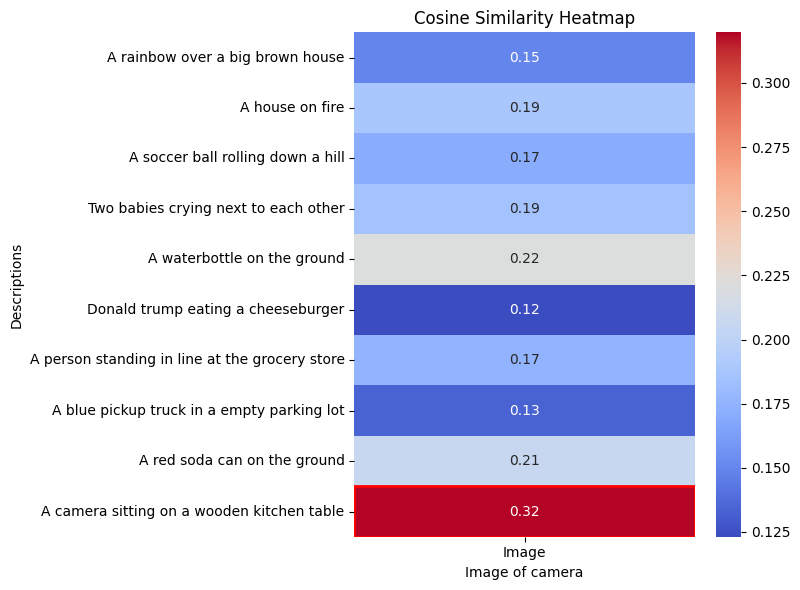

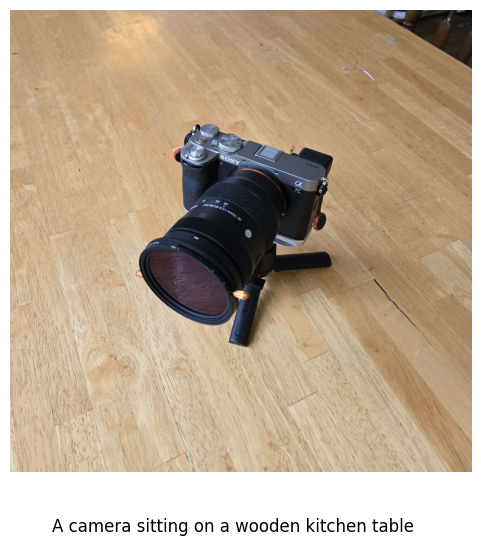

In [24]:
import torch
import clip
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------------
# Load Pretrained CLIP Model
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# -------------------------------
# Example Image and Descriptions
# -------------------------------
image_path = r"C:\Users\Dimitri Gonidakis\Desktop\School laptop\Year 5\Semester 2\Computational creativity\Project 3\camera.jpg"  # Path to the input image
descriptions = [
    "A rainbow over a big brown house",
    "A house on fire",
    "A soccer ball rolling down a hill",
    "Two babies crying next to each other",
    "A waterbottle on the ground",
    "Donald trump eating a cheeseburger",
    "A person standing in line at the grocery store",
    "A blue pickup truck in a empty parking lot",
    "A red soda can on the ground",
    "A camera sitting on a wooden kitchen table"  # The correct description
]

# -------------------------------
# Load and Preprocess Image
# -------------------------------
image = Image.open(image_path)
image_input = preprocess(image).unsqueeze(0).to(device)

# -------------------------------
# Encode Descriptions and Image
# -------------------------------
with torch.no_grad():
    # Encode the image
    image_features = clip_model.encode_image(image_input)

    # Encode the descriptions
    text_inputs = clip.tokenize(descriptions).to(device)
    text_features = clip_model.encode_text(text_inputs)

# Normalize the embeddings
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# -------------------------------
# Compute Cosine Similarities
# -------------------------------
cosine_similarities = cosine_similarity(image_features.cpu().numpy(), text_features.cpu().numpy())

# -------------------------------
# Find the Best Matching Description
# -------------------------------
best_match_index = cosine_similarities.argmax()
best_match_description = descriptions[best_match_index]

# Output the result
print(f"The best matching description is: '{best_match_description}'")


# -------------------------------
# Visualize the Similarity Heatmap
# -------------------------------
plt.figure(figsize=(8, 6))

# Create the heatmap with flipped axes
sns.heatmap(cosine_similarities.T, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=["Image"], yticklabels=descriptions)

# Add labels
plt.title("Cosine Similarity Heatmap")
plt.xlabel("Image of camera")
plt.ylabel("Descriptions")

# Highlight the best matching description
plt.gca().add_patch(plt.Rectangle((0, best_match_index), 1, 1, fill=False, edgecolor='red', lw=2))

# Show the heatmap
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))

# Show the image
plt.imshow(image)
plt.axis('off')  # Hide axes

# Add the best matching description as a caption
plt.figtext(0.5, 0.01, best_match_description, wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.show()